Golysheva Tatiana 

Dataset **Global Terrorism Database** (https://www.kaggle.com/datasets/START-UMD/gtd) obsahuje informace o teroristických útocích, ke kterým došlo v různých částech světa v období od roku 1970 do roku 2017. Jedná se o velmi užitečný dataset, protože umožňuje lepší porozumění charakteru teroristických činů a využití získaných znalostí pro vytvoření opatření k zajištění bezpečnosti.
Data zahrnují informace o více než 200 000 teroristických incidentech, ke kterým došlo ve více než 200 zemích a územích. Každý incident obsahuje informace o místě incidentu, druhu teroristického činu, účelu útoku, počtu obětí, organizačních skupinách a mnoho dalšího.
Analýza tohoto datasetu může pomoci odhalit trendy v teroristické činnosti v různých oblastech světa a také pomoci určit, jaké faktory mohou ovlivňovat počet teroristických útoků v různých oblastech a v různém čase. Provedeme vsechny potrebne importy:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns

V další části kódu se provádí analýza počtu teroristických útoků, které se v průběhu let vyskytly, a vytváří se graf, který zobrazuje dynamiku tohoto ukazatele v čase.

Z grafu lze usoudit, že počet teroristických útoků rostl od roku 1970 do roku 2017, dosahujícího maxima v roce 2014, a poté začal klesat. To může naznačovat, že bezpečnostní opatření a boj proti terorismu, přijaté v různých zemích, začaly přinášet své výsledky.

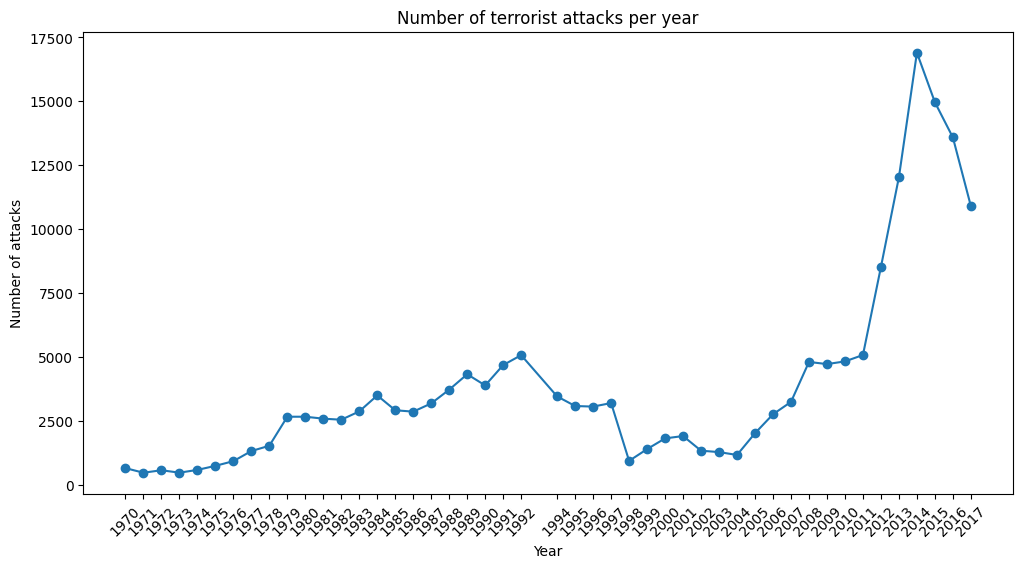

In [25]:
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

attacks_per_year = terrorism.groupby('iyear')['eventid'].count()

plt.figure(figsize=(12,6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o')
plt.xticks(attacks_per_year.index, rotation=45)
plt.title('Number of terrorist attacks per year')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

Další kód analyzuje počet teroristických útoků v závislosti na jejich typu. Za tímto účelem je datová sada seskupena podle typu útoku a počítá se počet útoků každého typu.

Poté se vytvoří sloupcový graf, který zobrazuje počet útoků každého typu. Z grafu můžeme usoudit, že nejčastější typy teroristických útoků jsou: útok na objekt, výbušné zařízení a vražda/sebevražda.
Taková analýza umožňuje lépe pochopit, jaké typy teroristických útoků jsou nejčastější a důležité pro vývoj bezpečnostních opatření.

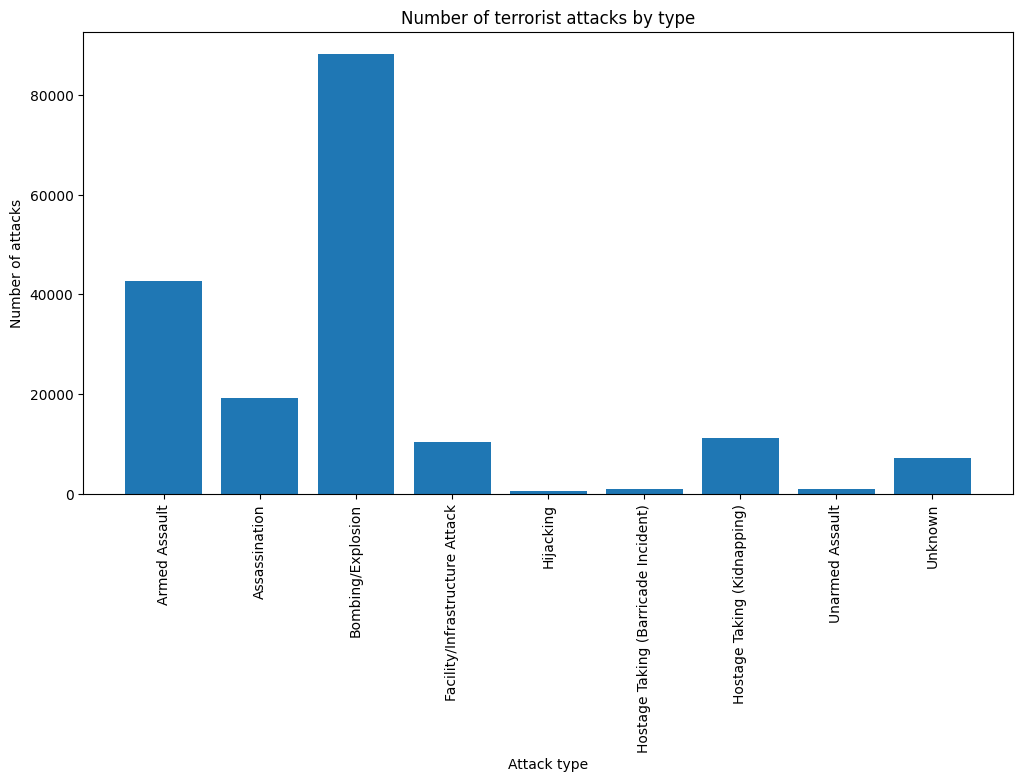

In [26]:
attacks_by_type = terrorism.groupby('attacktype1_txt')['eventid'].count()

plt.figure(figsize=(12,6))
plt.bar(attacks_by_type.index, attacks_by_type.values)
plt.xticks(rotation=90)
plt.title('Number of terrorist attacks by type')
plt.xlabel('Attack type')
plt.ylabel('Number of attacks')
plt.show()

Následně analyzujeme počet teroristických útoků, ke kterým došlo v České republice v období od roku 1970 (ve skutečnosti od roku 1993) do roku 2017. Nejprve se z datasetu vyberou pouze ty záznamy, kde je zemí původu útoku Česká republika. Poté se provede seskupení podle let a vypočítá se počet útoků v každém roce.

Z grafu lze usoudit, že celkový počet útoků v České republice je poměrně malý, což může naznačovat relativní stabilitu politické a sociální situace v zemi.

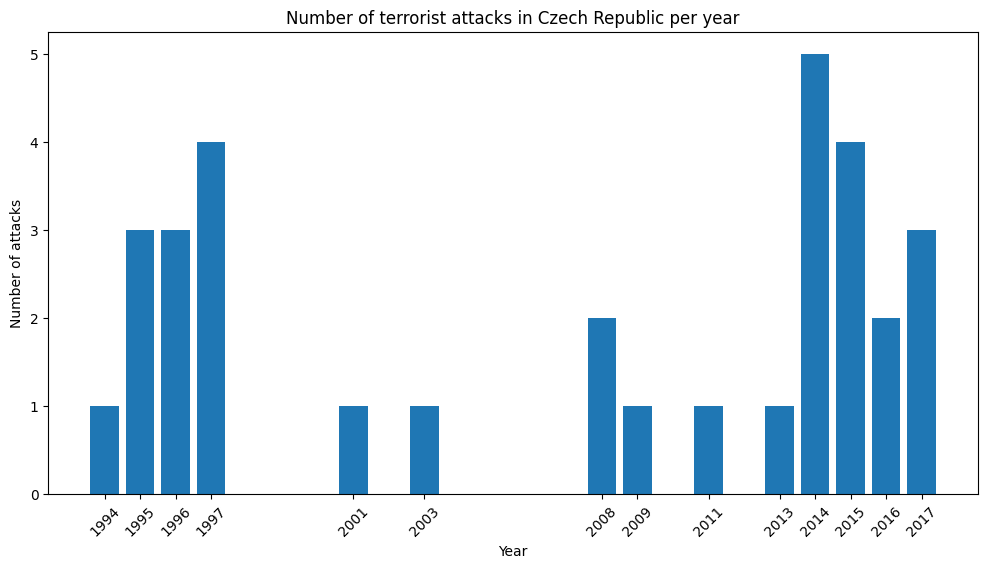

In [27]:
czech_attacks = terrorism[terrorism['country_txt'] == 'Czech Republic']
attacks_per_year = czech_attacks.groupby('iyear')['eventid'].count()

plt.figure(figsize=(12,6))
plt.bar(attacks_per_year.index, attacks_per_year.values)
plt.xticks(attacks_per_year.index, rotation=45)
plt.title('Number of terrorist attacks in Czech Republic per year')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

Další kód analyzuje počet teroristických útoků podle země a roku a zobrazuje graf, který umožňuje porovnat dynamiku teroristických útoků v různých zemích.
K tomu je nejprve vytvořen dataframe czech_attacks, který obsahuje informace o teroristických útocích, ke kterým došlo v České republice. Tento datový rámec je pak seskupen podle roku a pro každý rok se počítá počet teroristických útoků. Přijatá data se zobrazí v grafu.
Graf je vytvořen pomocí knihovny plotly.express a umožňuje vám porovnávat dynamiku teroristických útoků v různých zemích. Každá země je v grafu zobrazena jako samostatná čára a můžete vidět, jak se v průběhu času v každé z nich měnil počet teroristických útoků.

Z grafu můžeme usoudit, že počet teroristických útoků v různých zemích a v různých letech se může výrazně lišit. Některé země, jako Irák a Afghánistán, zažívají po dlouhou dobu vysoký počet teroristických útoků, zatímco jiné země mohou být po dlouhou dobu relativně bez teroristických útoků. To může naznačovat přítomnost různých faktorů ovlivňujících úroveň teroristické hrozby v různých oblastech světa.

In [28]:
country_year_counts = terrorism.groupby(['iyear', 'country_txt'])['eventid'].count().reset_index()
fig = px.line(country_year_counts, x='iyear', y='eventid', color='country_txt',
              title='Number of Terrorist Attacks by Country and Year')
fig.show()

Pak analyzujeme počet teroristických útoků, ke kterým v průběhu času došlo v různých oblastech světa. K tomu jsou data seskupena podle roku a regionu a poté je vytvořen sloupcový graf zobrazující počet útoků v každém regionu v každém roce.

Z grafu můžeme usoudit, že nejvíce teroristických útoků se odehrává v regionech Blízkého východu a severní Afriky a také v jižní Asii(Middle East, North Africa, South Asia). Graf navíc ukazuje prudký nárůst počtu útoků v těchto regionech mezi lety 2012 a 2014.

In [29]:
grouped_count_region = terrorism.groupby(['iyear', 'region_txt'])['eventid'].count().reset_index()

fig = px.bar(grouped_count_region, x='iyear', y='eventid', color='region_txt', 
             labels={'iyear': 'Year', 'eventid': 'Number of attacks', 'region_txt': 'Region'},
             title='Number of Attacks Per Region Per Year', height=800)
fig.show()

Tento kód analyzuje počet teroristických útoků v různých oblastech světa. Nejprve jsou data seskupena podle regionů a je spočítán počet útoků v každém regionu. Výsledky seskupení jsou poté seřazeny v sestupném pořadí a zobrazeny na sloupcovém grafu.

Výsledný graf ukazuje, že k nejvyššímu počtu teroristických útoků došlo v jižní Asii, dále na Blízkém východě a v severní Africe. Nejméně útoků bylo registrováno v Severní Americe a západní Evropě.
Také se zobrazí tabulka s informacemi o počtu útoků v jednotlivých regionech v sestupném pořadí.

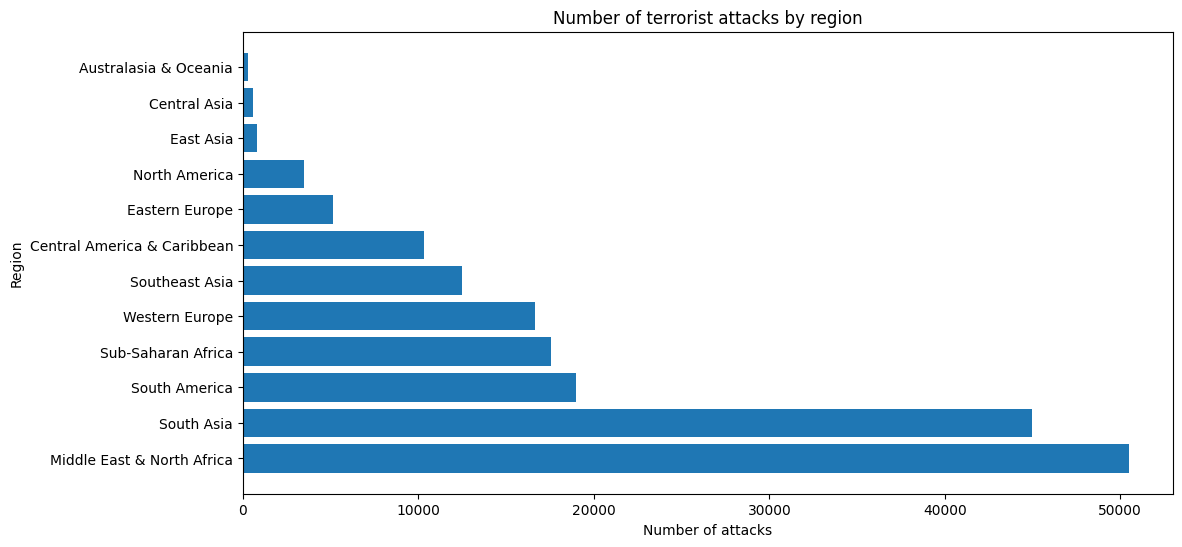

                         Region  Number of attacks
5    Middle East & North Africa              50474
8                    South Asia              44974
7                 South America              18978
10           Sub-Saharan Africa              17550
11               Western Europe              16639
9                Southeast Asia              12485
1   Central America & Caribbean              10344
4                Eastern Europe               5144
6                 North America               3456
3                     East Asia                802
2                  Central Asia                563
0         Australasia & Oceania                282


In [30]:
attacks_by_region = terrorism.groupby('region_txt')['eventid'].count().reset_index()
attacks_by_region = attacks_by_region.sort_values(by='eventid', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(attacks_by_region['region_txt'], attacks_by_region['eventid'])
plt.title('Number of terrorist attacks by region')
plt.xlabel('Number of attacks')
plt.ylabel('Region')
plt.show()
attacks_by_region.columns = ['Region', 'Number of attacks']
print(attacks_by_region)

Tento kód vytváří animovanou mapu, která ukazuje počet teroristických útoků podle zemí v různých letech. Pro každý rok je na mapě zobrazen počet útoků v každé zemi, přičemž počet útoků je určen barvou. Čím jasnější barva, tím více útoků bylo v dané zemi v daném roce. Názvy zemí lze zobrazit po najetí myší na odpovídající oblast na mapě.

Funkce px.choropleth() bere jako argumenty název datového rámce country_year_counts, název sloupce názvu země, režim zobrazení názvu země, název datového sloupce k zobrazení, název sloupce popisku a název sloupce animace. Na konci kódu je také zobrazen datový rámec country_year_counts, který obsahuje informace o počtu útoků podle země a roku.
Na konci zobrazíme tabulku, která obsahuje informace o počtu teroristických útoků v různých zemích v různých letech. Každý řádek tabulky odpovídá konkrétní kombinaci roku a země a ve sloupcích je uveden rok, název země a počet teroristických útoků, ke kterým v dané zemi došlo v daném roce.

In [31]:
fig = px.choropleth(country_year_counts, locations='country_txt', locationmode='country names',
                    color='eventid', hover_name='country_txt', animation_frame='iyear',
                    title='Number of Terrorist Attacks by Country and Year', height=600)
fig.show()

print(country_year_counts)

      iyear               country_txt  eventid
0      1970                 Argentina       21
1      1970                 Australia        1
2      1970                   Belgium        1
3      1970                   Bolivia        1
4      1970                    Brazil        6
...     ...                       ...      ...
3757   2017                   Vietnam        2
3758   2017  West Bank and Gaza Strip       83
3759   2017                     Yemen      226
3760   2017                    Zambia        2
3761   2017                  Zimbabwe        3

[3762 rows x 3 columns]


Dále vytvoříme mapu, která zobrazuje počet útoků pro každou zemi za celé období. Barva každé země na mapě odpovídá počtu útoků v dané zemi, a když na některou zemi najedete, objeví se informace o počtu útoků v dané zemi.

In [58]:
country_counts = terrorism.groupby('country_txt')['eventid'].count().reset_index()

fig = px.choropleth(country_counts, locations='country_txt', locationmode='country names',
                    color='eventid', hover_name='country_txt', title='Number of Terrorist Attacks by Country',
                    height=600)
fig.show()

Tento kód vytiskne 10 zemí s nejvyšším počtem teroristických útoků.

In [55]:
top_countries = terrorism['country_txt'].value_counts().head(10)
population = [37552781, 213222917, 35643000, 1354195680, 48909839, 105172925, 31444298, 6388126, 66727461, 81116450]
top_countries_df = pd.DataFrame({'country': top_countries.index, 'attacks': top_countries.values}, index=range(1, 11))
top_countries_df['population'] = population
print('Top 10 countries by number of terrorist attacks:')
print(top_countries_df)

Top 10 countries by number of terrorist attacks:
           country  attacks  population
1             Iraq    24636    37552781
2         Pakistan    14368   213222917
3      Afghanistan    12731    35643000
4            India    11960  1354195680
5         Colombia     8306    48909839
6      Philippines     6908   105172925
7             Peru     6096    31444298
8      El Salvador     5320     6388126
9   United Kingdom     5235    66727461
10          Turkey     4292    81116450


Z grafu můžeme usoudit, že v letech 1970 až 1999 tvořily většinu obětí teroristických útoků vojenské cíle, následované vládními, policejními a obchodními cíli. Menší podíl na počtu obětí teroristických útoků mají klidnější místa, jako jsou náboženské instituce, vzdělávací a vědecká centra.

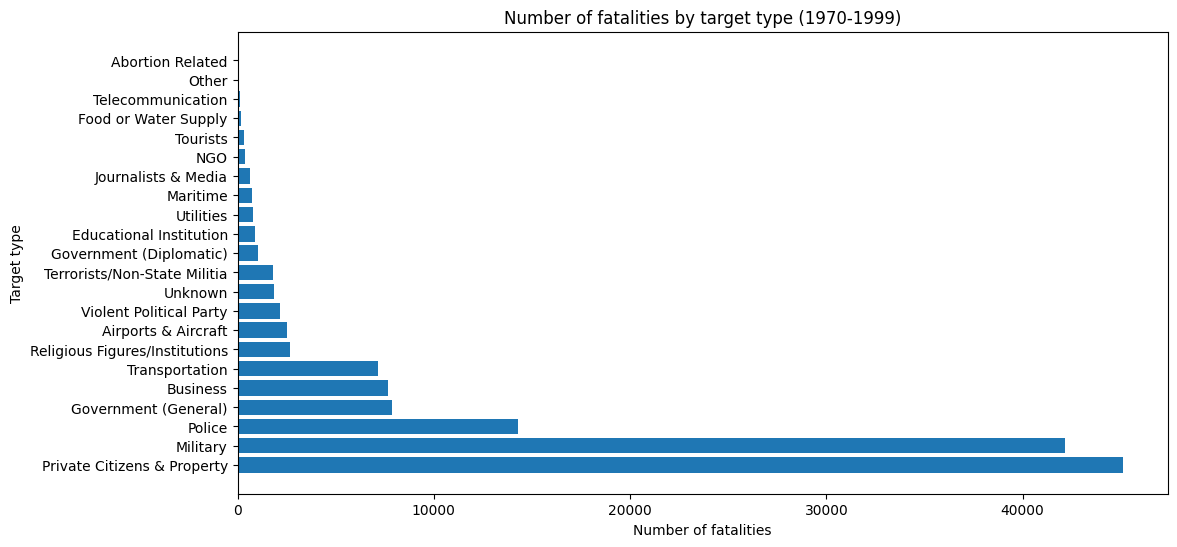

In [56]:
terrorism_before = terrorism[terrorism['iyear'].between(1970, 1999)]
target_casualties = terrorism_before.groupby(['targtype1_txt'])[['nkill']].sum().reset_index()
target_casualties = target_casualties.sort_values(by='nkill', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(target_casualties['targtype1_txt'], target_casualties['nkill'])
plt.title('Number of fatalities by target type (1970-1999)')
plt.xlabel('Number of fatalities')
plt.ylabel('Target type')
plt.show()

Při pohledu na grafy vidíme, že skupiny se příliš nezměnily, ale počet obětí se zvýšil. Oranžová barva ukazuje, jak to bylo v letech 1970-1999 (předchozí graf), modrá barva ukazuje aktuální data za roky 2000-2017.

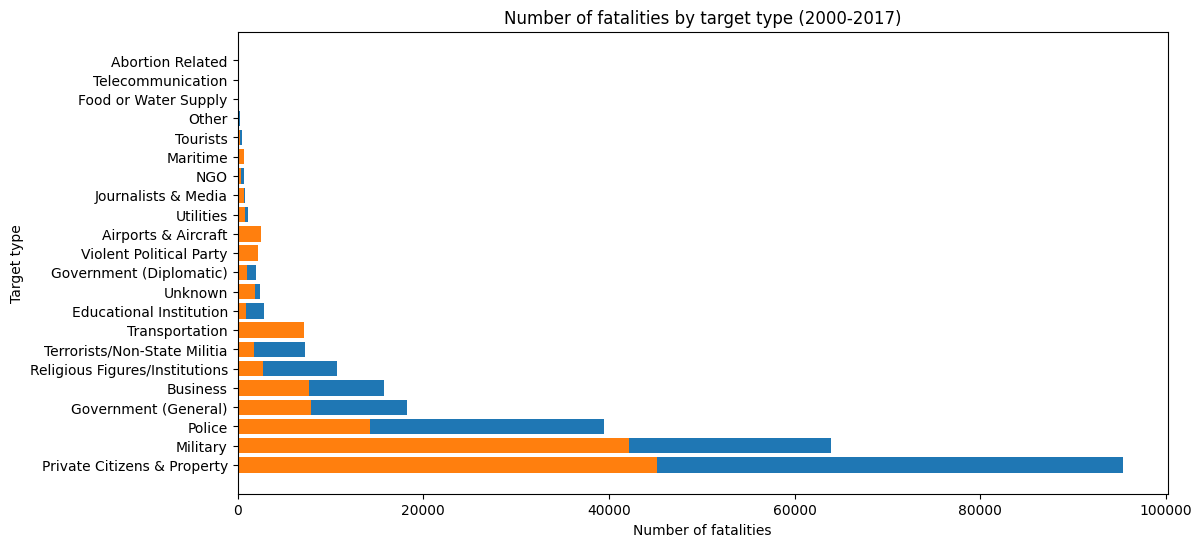

In [57]:
terrorism_after = terrorism[terrorism['iyear'].between(2000, 2017)]
target_casualties = terrorism_after.groupby(['targtype1_txt'])[['nkill']].sum().reset_index()
target_casualties = target_casualties.sort_values(by='nkill', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(target_casualties['targtype1_txt'], target_casualties['nkill'])

terrorism_before = terrorism[terrorism['iyear'].between(1970, 1999)]
target_casualties = terrorism_before.groupby(['targtype1_txt'])[['nkill']].sum().reset_index()
target_casualties = target_casualties.sort_values(by='nkill', ascending=False)
plt.barh(target_casualties['targtype1_txt'], target_casualties['nkill'])
plt.title('Number of fatalities by target type (2000-2017)')
plt.xlabel('Number of fatalities')
plt.ylabel('Target type')
plt.show()

Tento graf ukazuje 5 hlavních měst s nejvíce teroristickými útoky od roku 1970 do roku 2017. Graf ukazuje, že Bagdád má nejvyšší počet útoků, mnohém větší, než ostatní města. Celkově graf ukazuje, že k teroristickým útokům došlo v různých městech po celém světě, ale s různou frekvencí.

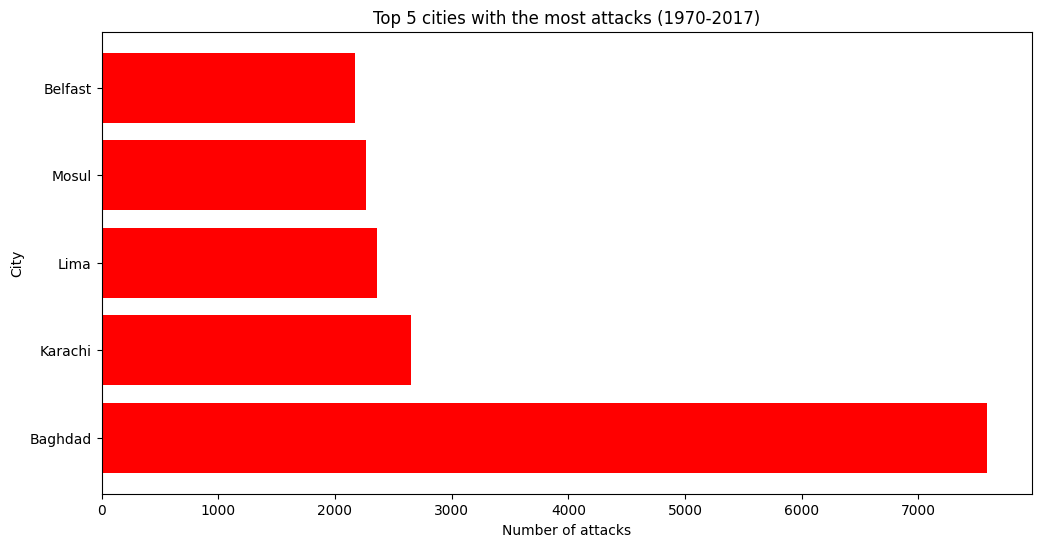

In [14]:
city = terrorism[terrorism['city'] != 'Unknown']

city_attacks = city.groupby(['city'])[['eventid']].count().reset_index()

city_attacks = city_attacks.sort_values(by='eventid', ascending=False)

top_cities_attacks = city_attacks.head(5)

plt.figure(figsize=(12,6))
plt.barh(top_cities_attacks['city'], top_cities_attacks['eventid'], color='red')
plt.title('Top 5 cities with the most attacks (1970-2017)')
plt.xlabel('Number of attacks')
plt.ylabel('City')
plt.show()


Tento graf ukazuje 5 hlavních měst s nejvyšším počtem obětí teroristických útoků od roku 1970 do roku 2017. Pro analýzu byly použity údaje o teroristických útocích, ke kterým došlo ve městech, kde byly známy údaje o počtu mrtvých.

Město Bagdád v Iráku je podle grafu hlavním centrem teroristických útoků s nejvyšším počtem obětí.

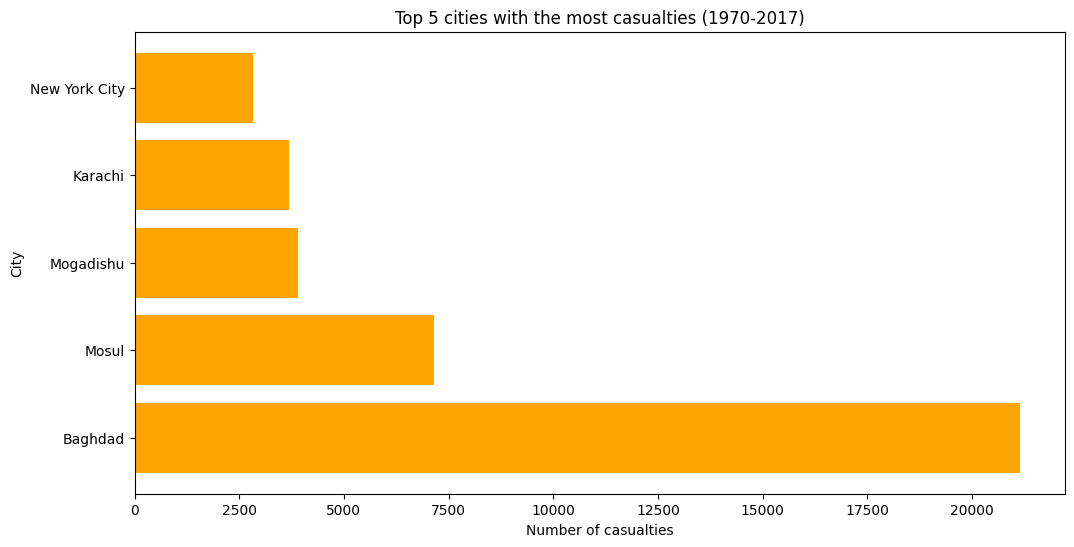

In [15]:
city_casualties = city.groupby(['city'])[['nkill']].sum().reset_index()
city_casualties = city_casualties.sort_values(by='nkill', ascending=False)
top_cities_casualties = city_casualties.head(5)

plt.figure(figsize=(12,6))
plt.barh(top_cities_casualties['city'], top_cities_casualties['nkill'], color='orange')
plt.title('Top 5 cities with the most casualties (1970-2017)')
plt.xlabel('Number of casualties')
plt.ylabel('City')
plt.show()


Tento graf ukazuje počet teroristických útoků podle regionů v jednotlivých měsících od roku 2000 do roku 2017. Graf umožňuje porovnat počet útoků mezi různými regiony a vidět dynamiku změn v počtu útoků během roku.

Z grafu lze vyvodit následující závěry:
+ Celkově je ve světě zaznamenáno více teroristických útoků během letních měsíců (červen, červenec, srpen).
+ Severní Amerika a západní Evropa mají trvale nízkou úroveň teroristické činnosti, zatímco Blízký východ a severní Afrika, jižní Asie a jihovýchodní Asie jsou nejnebezpečnějšími regiony s vysokou mírou teroristické činnosti.

In [16]:
columns = ['iyear', 'imonth', 'region_txt', 'eventid']
grouped_data = terrorism_after.groupby(['region_txt', 'imonth'])['eventid'].count().reset_index()

fig = px.line(grouped_data, x='imonth', y='eventid', color='region_txt',
              labels={'imonth': 'Month', 'eventid': 'Number of Attacks'},
              title='Number of Attacks by Region and Month (2000-2017)')
fig.show()

Z tohoto grafu můžeme usoudit, že za největší počet obětí je odpovědných několik teroristických skupin. Graf konkrétně ukazuje, že nejvíce úmrtí má na svědomí skupina Islámský stát v Iráku a Levantě (ISIL), následovaná Talibanem a Boko Haram. Graf ukazuje pouze údaje o smrtelných úrazech, a to není úplný obrázek o teroristické činnosti těchto skupin.

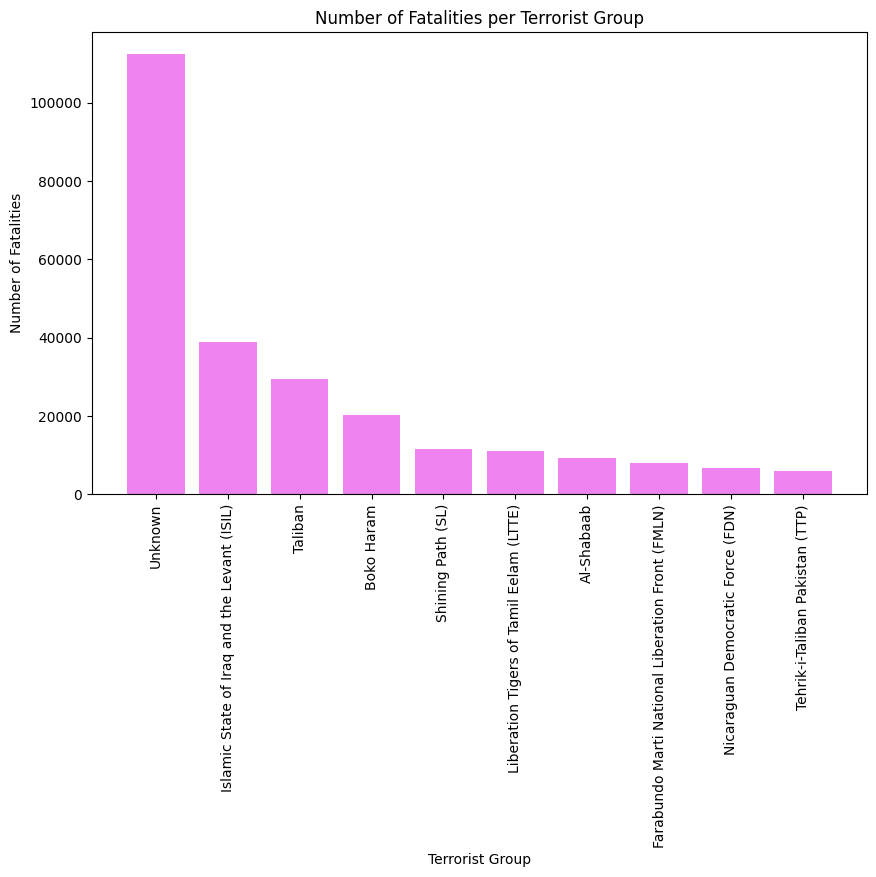

In [17]:
grouped_data = terrorism[['gname', 'nkill']].groupby(['gname']).sum()
# grouped_data = data.groupby(['gname']).sum()
grouped_data = grouped_data.sort_values(by=['nkill'], ascending=False)
top_groups = grouped_data.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_groups.index, top_groups['nkill'], color='violet')
plt.xticks(rotation=90)
plt.title('Number of Fatalities per Terrorist Group')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Fatalities')
plt.show()

Pojďme analyzovat aktivitu teroristických skupin a sestavit graf počtu útoků každé skupiny:

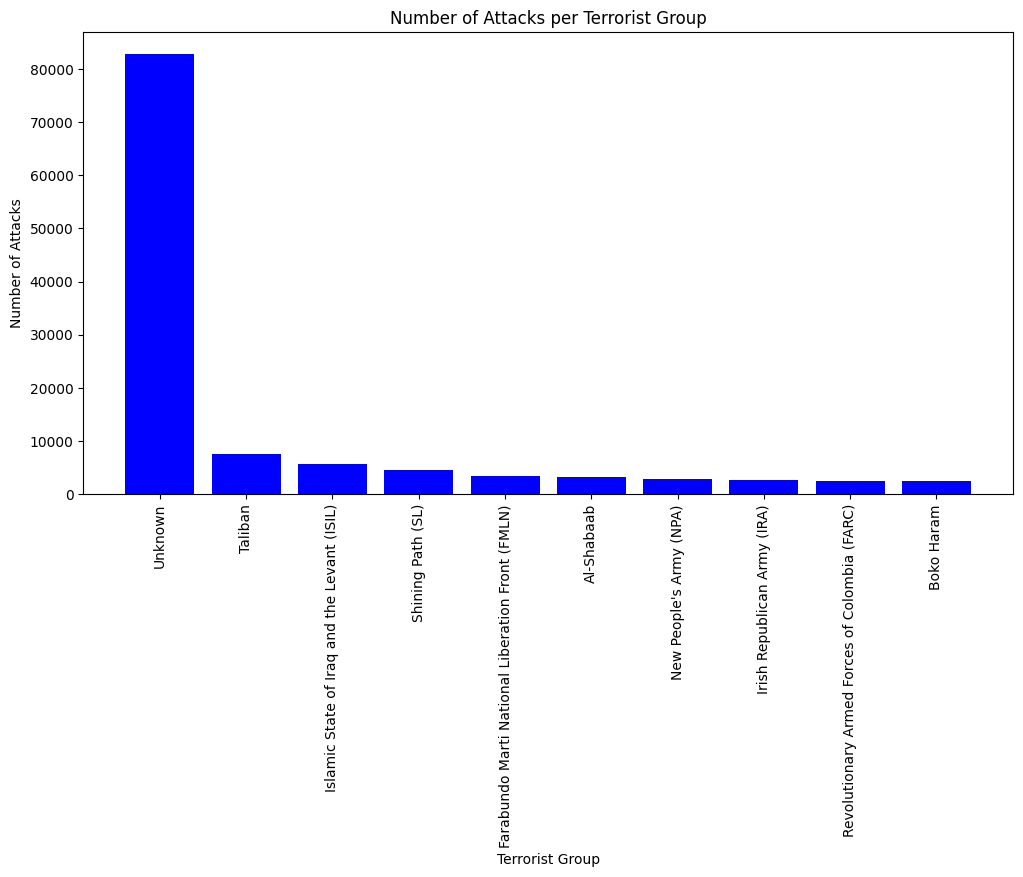

In [18]:
group_name_data = terrorism[['gname', 'eventid']].groupby(['gname']).count()
group_name_data = group_name_data.sort_values(by=['eventid'], ascending=False)
top_groups = group_name_data.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_groups.index, top_groups['eventid'], color='blue')
plt.xticks(rotation=90)
plt.title('Number of Attacks per Terrorist Group')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.show()

In [19]:
terrorism_group = terrorism[terrorism['gname'].isin(['Taliban', 'Islamic State of Iraq and the Levant (ISIL)'])]
grouped_data = terrorism_group.groupby(['region_txt', 'gname']).agg({'eventid': 'count', 'nkill': 'sum'})
grouped_data.columns = ['Attack Count', 'Fatalities']
grouped_data = grouped_data.reset_index().set_index(['region_txt', 'gname']).sort_index()
print(grouped_data)

                                                                        Attack Count  \
region_txt                 gname                                                       
Australasia & Oceania      Islamic State of Iraq and the Levant (ISIL)             1   
Central Asia               Islamic State of Iraq and the Levant (ISIL)             1   
                           Taliban                                                 1   
Eastern Europe             Islamic State of Iraq and the Levant (ISIL)             4   
Middle East & North Africa Islamic State of Iraq and the Levant (ISIL)          5563   
South Asia                 Taliban                                              7477   
Southeast Asia             Islamic State of Iraq and the Levant (ISIL)            28   
Sub-Saharan Africa         Islamic State of Iraq and the Levant (ISIL)             1   
Western Europe             Islamic State of Iraq and the Levant (ISIL)            15   

                               

Je vidět, že Taliban provedl největší počet útoků a vyžádal si největší počet obětí v jihoasijském regionu. ISIL je také velmi aktivní v regionu, ale také provedl mnoho útoků a vyžádal si mnoho obětí na Blízkém východě a v regionu severní Afriky.

Tento kód vytváří tepelnou mapu korelace mezi různými kvantitativními charakteristikami teroristických útoků, jako je počet zabitých lidí, počet zraněných, počet zabitých občanů USA, počet zraněných občanů USA. Korelace je statistická míra, která měří míru asociace mezi dvěma proměnnými. Hodnota korelace se může pohybovat od -1 do 1. Pokud je hodnota blízká -1, znamená to, že obě proměnné jsou nepřímo korelované (když jedna proměnná roste, druhá klesá), a je-li hodnota blízká 1, znamená to, že obě proměnné přímo korelují (když jedna proměnná se zvyšuje, druhá se také zvyšuje). Pokud je hodnota blízká 0, znamená to, že mezi proměnnými neexistuje žádná korelace.

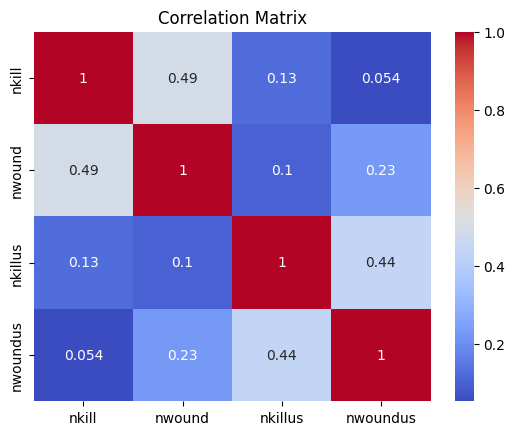

In [13]:
cols = ['nkill', 'nwound', 'nkillus', 'nwoundus']
data1 = terrorism[cols].dropna()
corr_matrix = data1.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Tato analýza pomáhá pochopit, které z parametrů teroristických útoků spolu nejvíce korelují. Můžete například vidět, že počet zabitých lidí a počet zraněných spolu vysoce korelují, což je logické, protože ve většině případů, pokud dojde k teroristickému útoku, je zabit nebo zraněn alespoň jeden člověk. Je také vidět, že počet zabitých občanů USA má velmi nízkou korelaci se ostatními parametry, což může naznačovat, že mezi cíli teroristických útoků nejsou občané USA hlavní cílovou skupinou teroristů. 

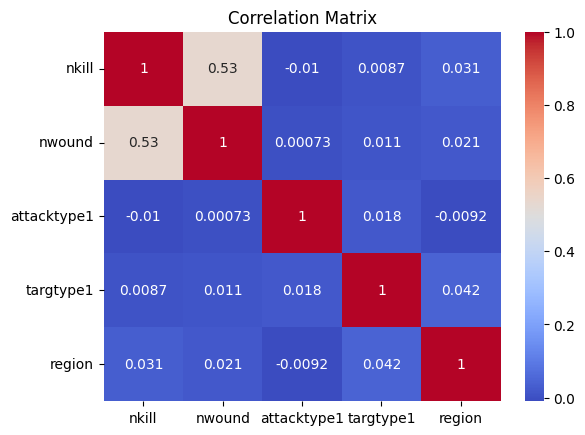

In [52]:
data2 = terrorism[['nkill', 'nwound', 'attacktype1', 'targtype1', 'region']].dropna()
corr_matrix = data2.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Z tepelné mapy lze vyvodit následující závěry:

+ Počet zabitých lidí a počet zraněných mají mezi sebou opět korelaci, což potvrzuje předchozí analýzu.
+ Oblast, kde k útoku došlo, má malou nebo žádnou korelaci s jakoukoli z dalších proměnných, což může naznačovat, že teroristické útoky jsou globální a nejsou specifické pro daný region.